In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('nhanes_breast_cancer_all_nhanes_biochemistry.csv')

In [42]:
data = df.copy()

In [43]:
data.head()

,Id,Age,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),...,Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l),Breast cancer
0,94.0,61.0,21.0,40.0,21.0,25.0,15.0,5.4,101.7,6.08,...,277.0,1.227,4.13,138.3,5.1,2.275,71.0,2.269,285.5,1
1,206.0,50.0,23.0,45.0,25.0,27.0,16.0,5.7,101.8,6.28,...,281.0,1.130,4.16,140.9,8.6,2.325,74.0,1.106,267.7,1
2,237.0,81.0,13.0,45.0,19.0,23.0,17.0,6.1,104.0,6.78,...,287.0,1.130,4.64,143.5,12.0,2.400,77.0,1.039,243.9,1
3,281.0,15.0,9.0,47.0,16.0,25.0,7.0,2.5,102.4,3.26,...,279.0,1.195,4.62,141.4,13.7,2.375,70.0,0.474,190.3,0
4,389.0,81.0,27.0,42.0,32.0,30.0,18.0,6.4,104.0,4.60,...,289.0,1.162,3.97,144.6,23.9,2.450,68.0,1.219,279.6,1


Observations
1. There is an id that cannot be used for classificaiton 
2. Breast Cancer is our class label

In [44]:
# feature names as a list
col = data.columns  
col

Index(['Id', 'Age', 'Bio_alanine aminotransferase alt (iu/l)',
       'Bio_albumin (g/l)', 'Bio_aspartate aminotransferase ast (iu/l)',
       'Bio_bicarbonate (mmol/l)', 'Bio_blood urea nitrogen (mg/dl)',
       'Bio_blood urea nitrogen (mmol/l)', 'Bio_chloride (mmol/l)',
       'Bio_cholesterol (mmol/l)', 'Bio_creatinine (umol/l)',
       'Bio_gamma glutamyl transferase (u/l)', 'Bio_globulin (g/l)',
       'Bio_glucose, refrigerated serum (mmol/l)',
       'Bio_iron, refrigerated serum (umol/l)', 'Bio_osmolality (mmol/kg)',
       'Bio_phosphorus (mmol/l)', 'Bio_potassium (mmol/l)',
       'Bio_sodium (mmol/l)', 'Bio_total bilirubin (umol/l)',
       'Bio_total calcium (mmol/l)', 'Bio_total protein (g/l)',
       'Bio_triglycerides, refrigerated (mmol/l)', 'Bio_uric acid (umol/l)',
       'Breast cancer'],
      dtype='object')

In [45]:
# y includes our labels and x includes our features
y = data['Breast cancer']                          # M or B 
list = ['Id','Breast cancer','Age']
x = data.drop(list,axis = 1 )
x.head()

,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),Bio_creatinine (umol/l),Bio_gamma glutamyl transferase (u/l),...,"Bio_iron, refrigerated serum (umol/l)",Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l)
0,21.0,40.0,21.0,25.0,15.0,5.4,101.7,6.08,53.0,22.0,...,15.58,277.0,1.227,4.13,138.3,5.1,2.275,71.0,2.269,285.5
1,23.0,45.0,25.0,27.0,16.0,5.7,101.8,6.28,61.9,28.0,...,13.07,281.0,1.130,4.16,140.9,8.6,2.325,74.0,1.106,267.7
2,13.0,45.0,19.0,23.0,17.0,6.1,104.0,6.78,44.2,20.0,...,14.51,287.0,1.130,4.64,143.5,12.0,2.400,77.0,1.039,243.9
3,9.0,47.0,16.0,25.0,7.0,2.5,102.4,3.26,35.4,8.0,...,3.40,279.0,1.195,4.62,141.4,13.7,2.375,70.0,0.474,190.3
4,27.0,42.0,32.0,30.0,18.0,6.4,104.0,4.60,61.9,30.0,...,15.04,289.0,1.162,3.97,144.6,23.9,2.450,68.0,1.219,279.6


Yes:  566
No :  566


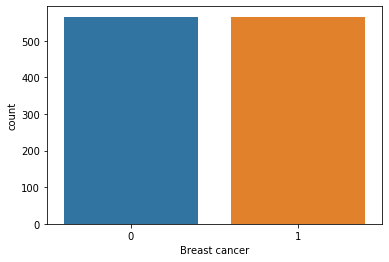

In [8]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
yes, no = y.value_counts()
print('Yes: ',yes)
print('No : ',no)

In [10]:
x.describe()

,Age,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),Bio_creatinine (umol/l),...,"Bio_iron, refrigerated serum (umol/l)",Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l)
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000
mean,54.113958,20.920495,41.793286,23.742933,24.862191,13.759717,4.912668,103.470053,5.080999,70.718375,...,14.044267,278.294170,1.252360,3.982986,139.152297,1.054261e+01,2.367049,71.280035,1.571526,298.330477
std,21.992328,11.074654,3.237658,8.395938,2.368841,6.385954,2.279789,3.008587,1.113162,32.786448,...,5.828937,5.657561,0.172595,0.344969,2.513529,4.153504e+00,0.099716,4.896292,1.056328,81.672916
min,12.000000,6.000000,28.000000,9.000000,16.000000,3.000000,1.070000,91.000000,1.914000,26.500000,...,1.300000,241.000000,0.710000,2.500000,121.000000,5.397605e-79,1.975000,54.000000,0.203000,83.300000
25%,36.000000,15.000000,40.000000,19.000000,23.000000,10.000000,3.570000,102.000000,4.319000,56.580000,...,10.000000,275.000000,1.130000,3.800000,138.000000,8.550000e+00,2.300000,68.000000,0.903000,243.900000
50%,60.000000,18.000000,42.000000,22.000000,25.000000,13.000000,4.640000,104.000000,4.939000,65.420000,...,13.430000,278.000000,1.259000,4.000000,139.000000,1.026000e+01,2.350000,71.000000,1.321000,285.500000
75%,72.000000,23.000000,44.000000,26.000000,26.000000,16.000000,5.710000,105.000000,5.747500,79.560000,...,17.200000,282.000000,1.356000,4.200000,141.000000,1.197000e+01,2.425000,74.000000,1.908000,340.500000
max,85.000000,120.000000,52.000000,105.000000,35.000000,69.000000,24.630000,113.000000,11.585000,875.200000,...,48.000000,301.000000,1.970000,5.860000,147.000000,4.275000e+01,3.025000,96.000000,11.200000,826.800000


# Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

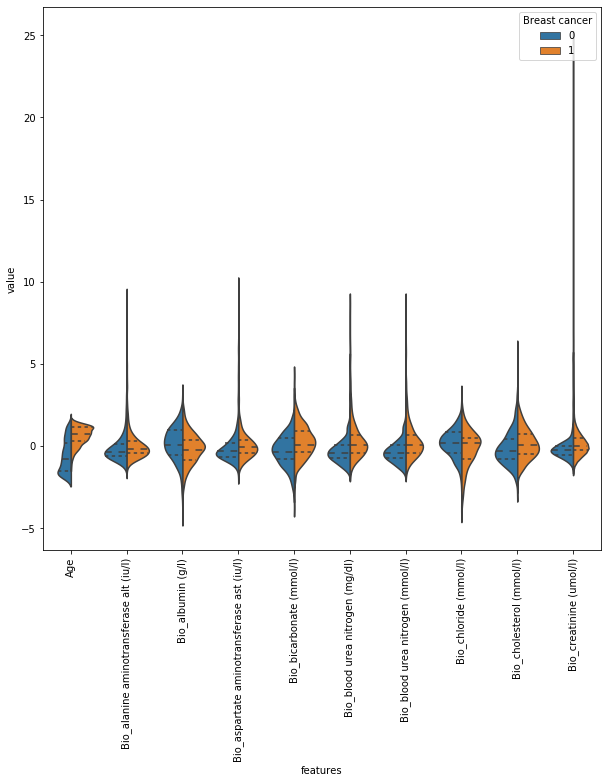

In [22]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Breast cancer", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

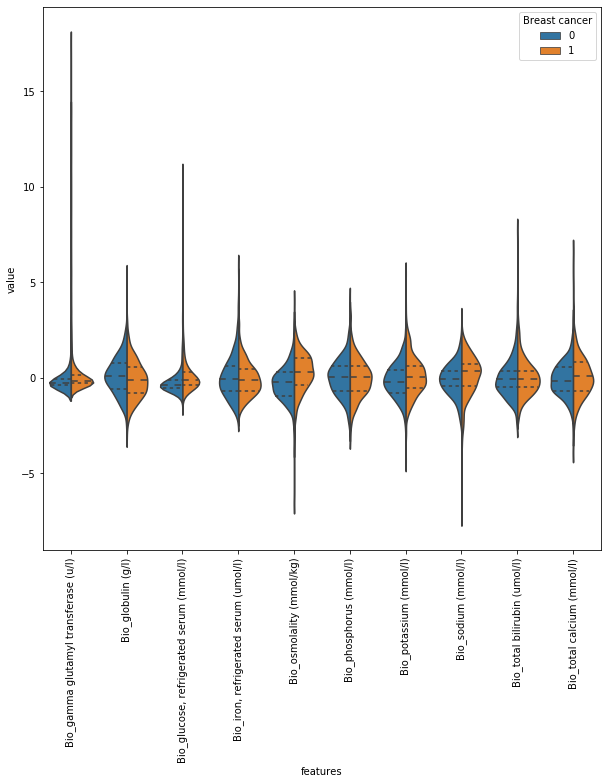

In [18]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Breast cancer", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

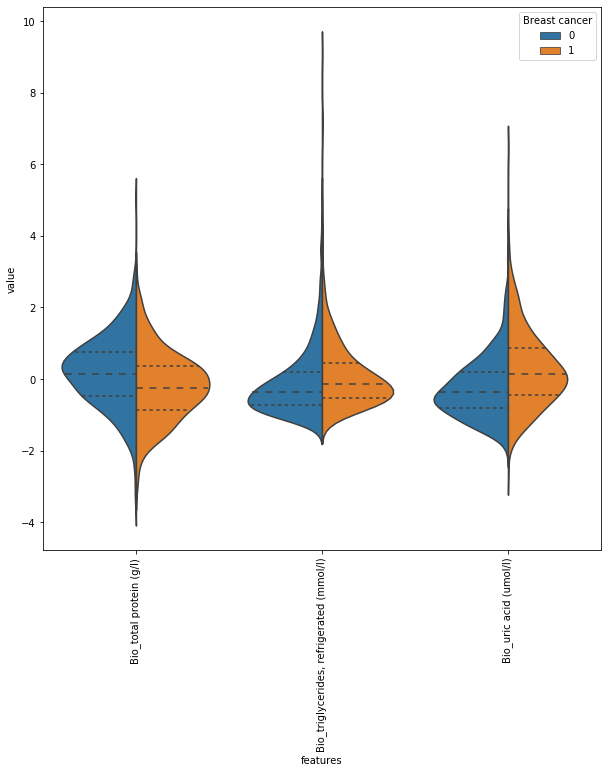

In [20]:
# Last features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Breast cancer", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

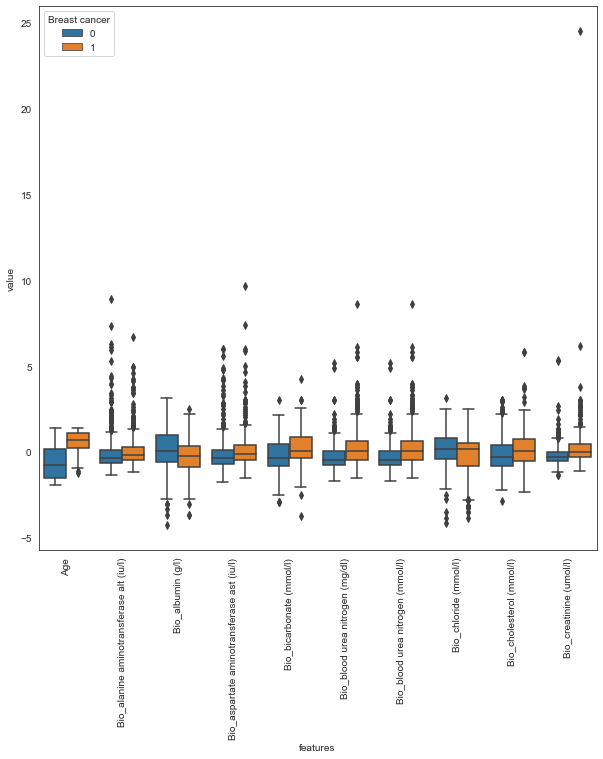

In [28]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
sns.set_style('white', {'legend.frameon':True})
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Breast cancer", data=data)
plt.xticks(rotation=90)


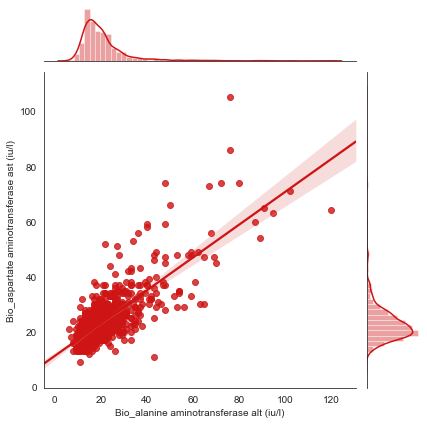

In [29]:
sns.jointplot(x.loc[:,'Bio_alanine aminotransferase alt (iu/l)'],
              x.loc[:,'Bio_aspartate aminotransferase ast (iu/l)'],
                    kind="regg", color="#ce1414")

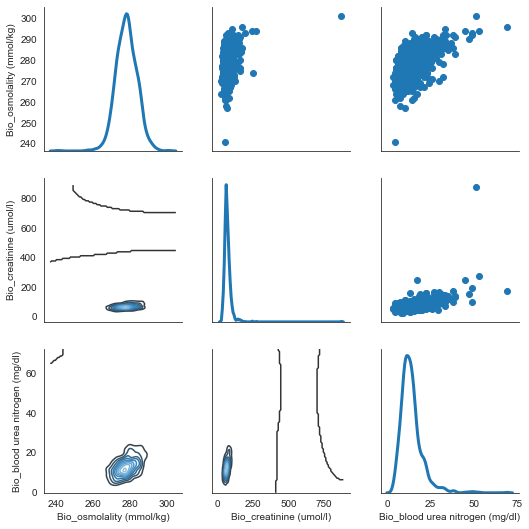

In [30]:
df = x.loc[:,['Bio_osmolality (mmol/kg)',
              'Bio_creatinine (umol/l)' ,
              'Bio_blood urea nitrogen (mg/dl)']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

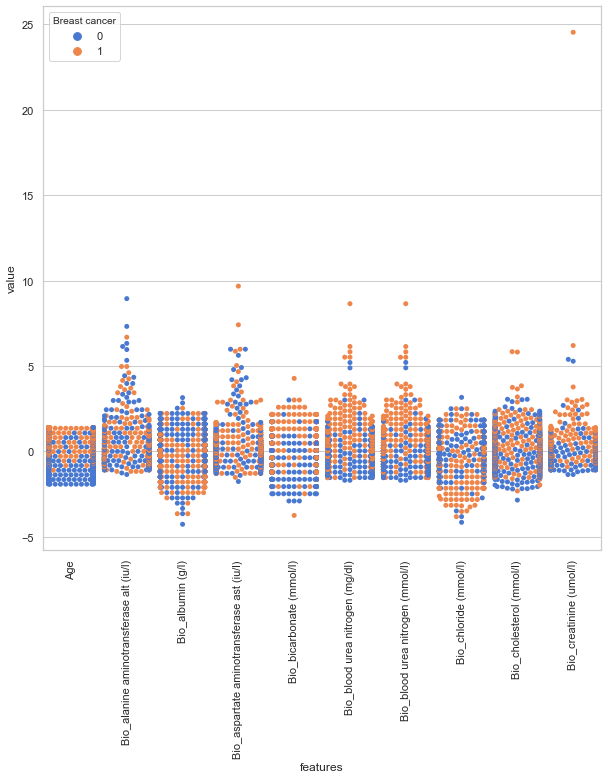

In [32]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Breast cancer", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

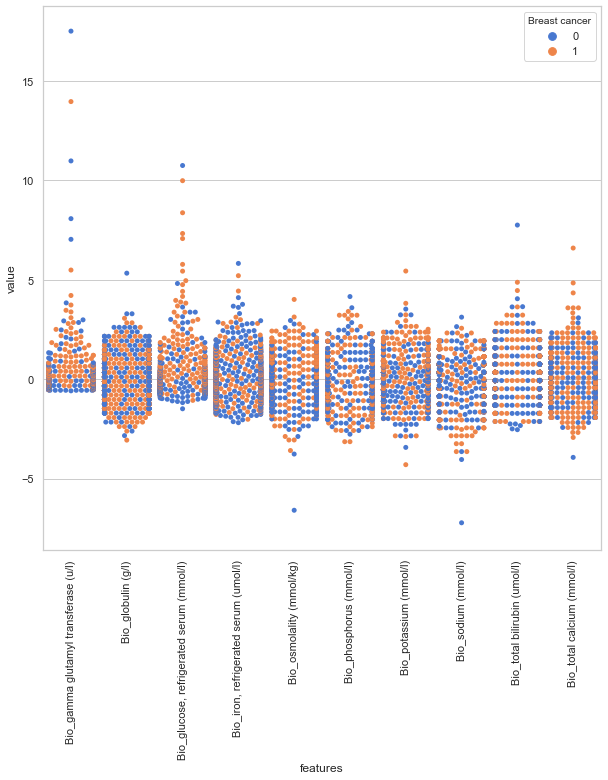

In [33]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Breast cancer", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

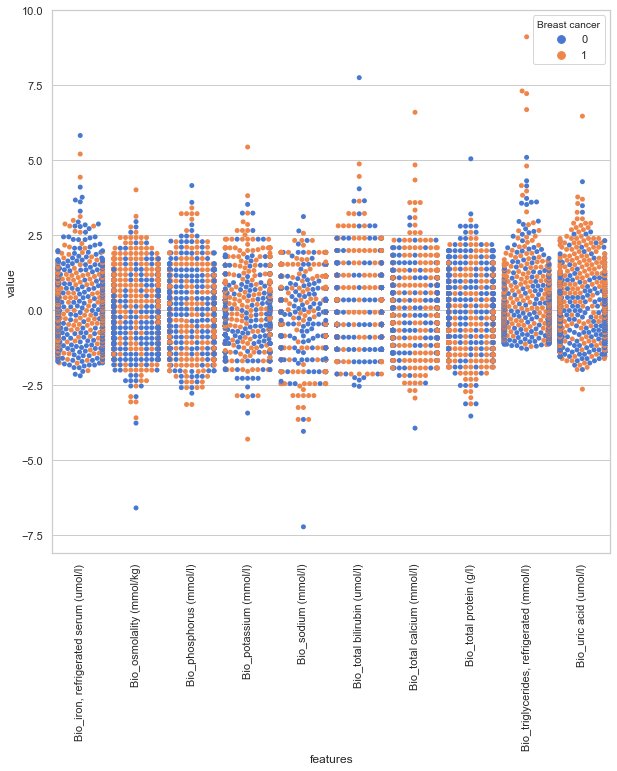

In [37]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,13:]],axis=1)
data = pd.melt(data,id_vars="Breast cancer",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Breast cancer", data=data)

plt.xticks(rotation=90)

(23.0, 0.0)

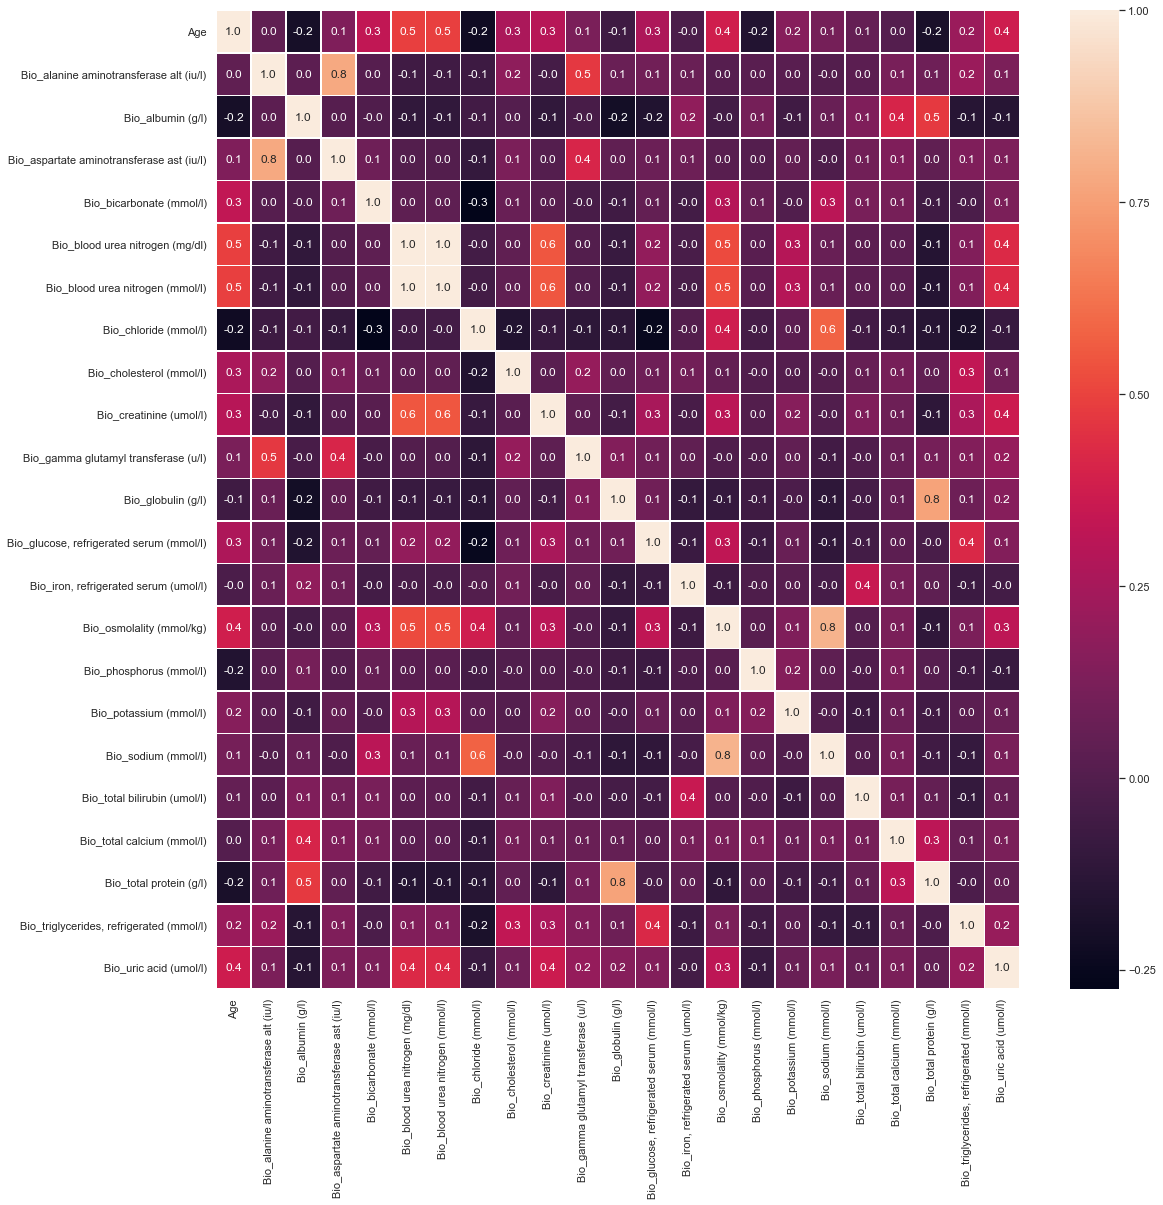

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


### correlated features
- 'Bio_blood urea nitrogen (mg/dl)', 'Bio_blood urea nitrogen (mmol/l)', 
- 'Bio_alanine aminotransferase alt (iu/l)','Bio_aspartate aminotransferase ast (iu/l)'
- 'Bio_globulin (g/l)', 'Bio_total protein (g/l)'
- 'Bio_sodium (mmol/l)', 'Bio_osmolality (mmol/kg)'


# Feature Selection and Random Forest Classification¶


In [46]:
drop_list1 = ['Bio_blood urea nitrogen (mmol/l)',
           'Bio_alanine aminotransferase alt (iu/l)',
           'Bio_total protein (g/l)',
           'Bio_sodium (mmol/l)']
x_1 = x.drop(drop_list1,axis = 1 ) # do not modify x, we will use it later 
x_1.head()

,Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),Bio_creatinine (umol/l),Bio_gamma glutamyl transferase (u/l),Bio_globulin (g/l),"Bio_glucose, refrigerated serum (mmol/l)","Bio_iron, refrigerated serum (umol/l)",Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l)
0,40.0,21.0,25.0,15.0,101.7,6.08,53.0,22.0,31.0,5.051,15.58,277.0,1.227,4.13,5.1,2.275,2.269,285.5
1,45.0,25.0,27.0,16.0,101.8,6.28,61.9,28.0,29.0,4.607,13.07,281.0,1.130,4.16,8.6,2.325,1.106,267.7
2,45.0,19.0,23.0,17.0,104.0,6.78,44.2,20.0,32.0,5.107,14.51,287.0,1.130,4.64,12.0,2.400,1.039,243.9
3,47.0,16.0,25.0,7.0,102.4,3.26,35.4,8.0,23.0,4.330,3.40,279.0,1.195,4.62,13.7,2.375,0.474,190.3
4,42.0,32.0,30.0,18.0,104.0,4.60,61.9,30.0,26.0,4.607,15.04,289.0,1.162,3.97,23.9,2.450,1.219,279.6


(18.0, 0.0)

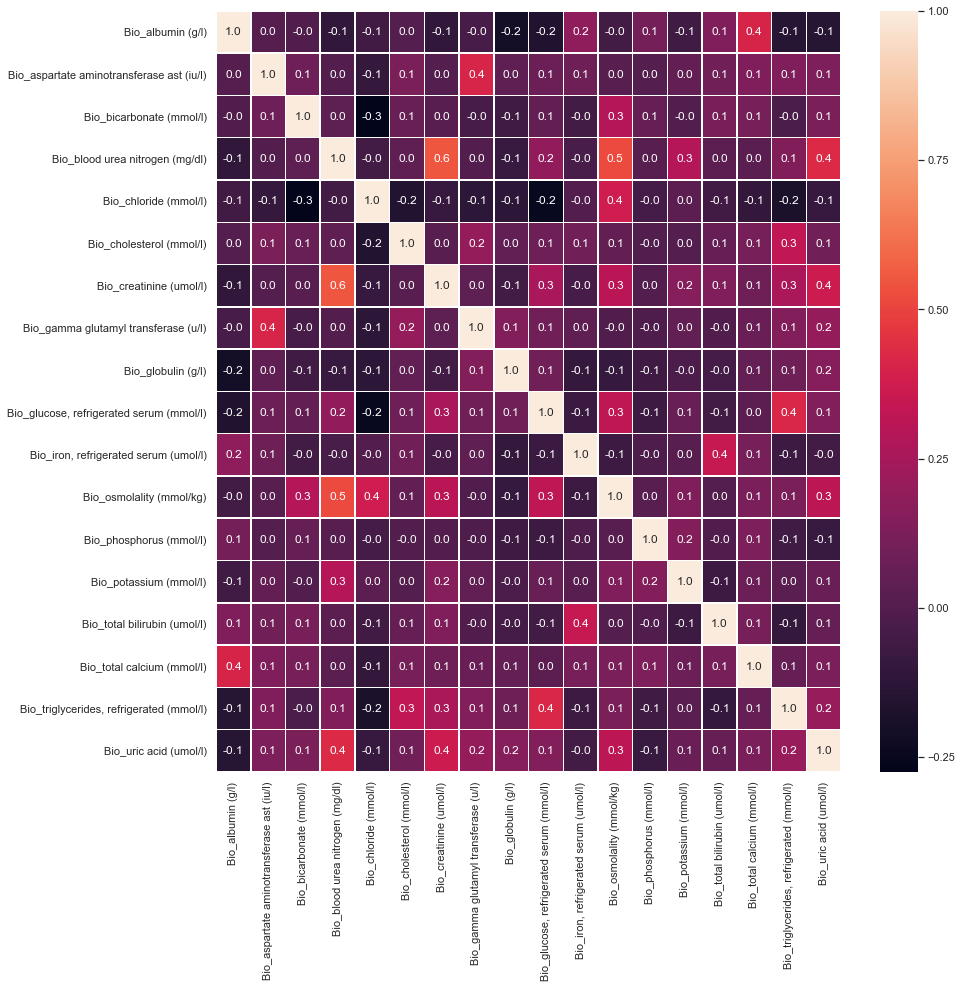

In [48]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

# random forest classifier with n_estimators=10 (default)

In [51]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.7


(18.5, -0.5)

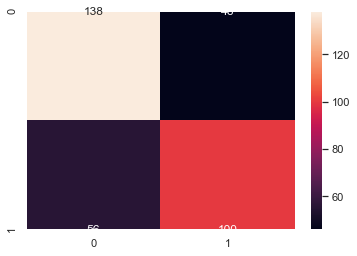

In [53]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 2.Univariate feature selection and random forest classification


In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [55]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [3.71451004e+00 2.54414594e+01 1.53942168e+01 1.93269987e+02
 1.15246531e+00 4.70163966e+00 3.36581498e+02 3.51706667e+02
 9.20352941e+00 1.46921824e+01 7.62765841e-01 6.82735906e+00
 2.54567142e-03 2.33887321e-01 4.74821999e-01 6.51931474e-03
 4.93155519e+00 1.12131334e+03]
Feature list: Index(['Bio_albumin (g/l)', 'Bio_aspartate aminotransferase ast (iu/l)',
       'Bio_bicarbonate (mmol/l)', 'Bio_blood urea nitrogen (mg/dl)',
       'Bio_chloride (mmol/l)', 'Bio_cholesterol (mmol/l)',
       'Bio_creatinine (umol/l)', 'Bio_gamma glutamyl transferase (u/l)',
       'Bio_globulin (g/l)', 'Bio_glucose, refrigerated serum (mmol/l)',
       'Bio_iron, refrigerated serum (umol/l)', 'Bio_osmolality (mmol/kg)',
       'Bio_phosphorus (mmol/l)', 'Bio_potassium (mmol/l)',
       'Bio_total bilirubin (umol/l)', 'Bio_total calcium (mmol/l)',
       'Bio_triglycerides, refrigerated (mmol/l)', 'Bio_uric acid (umol/l)'],
      dtype='object')


####  lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.6411764705882353


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


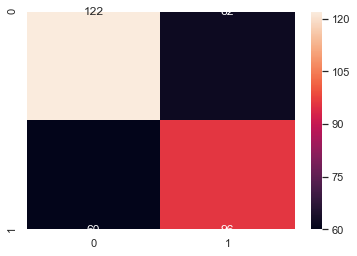

In [56]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# 3. Recursive feature elimination (RFE) with random forest

In [58]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [59]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Bio_blood urea nitrogen (mg/dl)',
       'Bio_gamma glutamyl transferase (u/l)',
       'Bio_glucose, refrigerated serum (mmol/l)',
       'Bio_triglycerides, refrigerated (mmol/l)', 'Bio_uric acid (umol/l)'],
      dtype='object')


In [65]:
x_train_3 = rfe.transform(x_train)
x_test_3 = rfe.transform(x_test)

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train_3, y_train)

ac_3 = accuracy_score(y_test,rfe.predict(x_test_3))
print('Accuracy is: ',ac_3)

ValueError: X has a different shape than during fitting.

In [66]:
print('Accuracy is: ',ac_3)

Accuracy is:  0.6470588235294118


# 4. Recursive feature elimination with cross validation and random forest classification¶


In [67]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Optimal number of features : 14
Best features : Index(['Bio_aspartate aminotransferase ast (iu/l)', 'Bio_bicarbonate (mmol/l)',
       'Bio_blood urea nitrogen (mg/dl)', 'Bio_cholesterol (mmol/l)',
       'Bio_creatinine (umol/l)', 'Bio_gamma glutamyl transferase (u/l)',
       'Bio_globulin (g/l)', 'Bio_glucose, refrigerated serum (mmol/l)',
       'Bio_iron, refrigerated serum (umol/l)', 'Bio_osmolality (mmol/kg)',
       'Bio_potassium (mmol/l)', 'Bio_total calcium (mmol/l)',
       'Bio_triglycerides, refrigerated (mmol/l)', 'Bio_uric acid (umol/l)'],
      dtype='object')


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


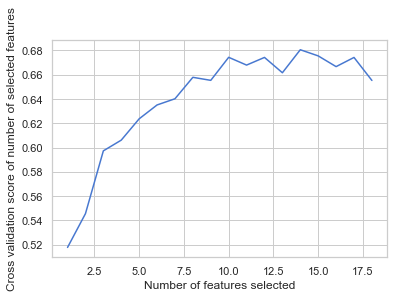

In [68]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 5. Tree based feature selection and random forest classification

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 3 (0.087291)
2. feature 6 (0.081382)
3. feature 9 (0.078328)
4. feature 11 (0.066883)
5. feature 5 (0.063225)
6. feature 16 (0.063195)
7. feature 17 (0.060812)
8. feature 2 (0.059255)
9. feature 8 (0.057028)
10. feature 7 (0.055530)
11. feature 12 (0.046042)
12. feature 0 (0.045918)
13. feature 13 (0.045596)
14. feature 4 (0.040778)
15. feature 1 (0.039899)
16. feature 15 (0.039021)
17. feature 10 (0.038687)
18. feature 14 (0.031130)


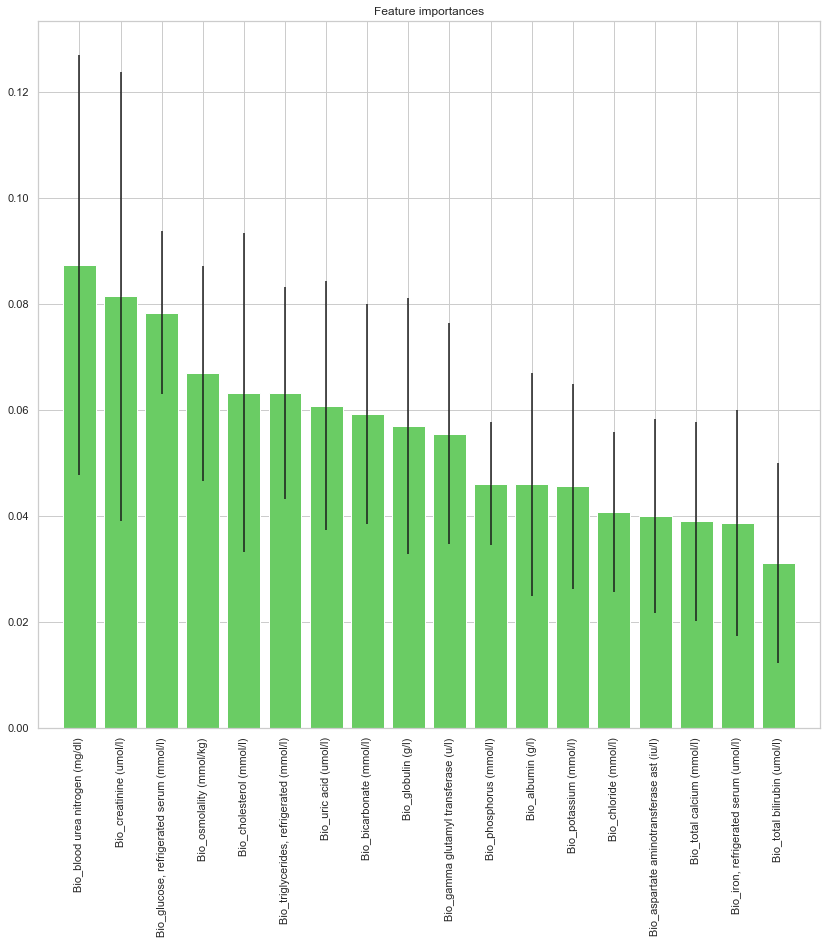

In [69]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# random forest classifier with n_estimators=100

In [70]:
clf_rf_5 = RandomForestClassifier(n_estimators=100)      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)

In [71]:
prediction=clr_rf_5.predict(x_test)

In [73]:
from sklearn import metrics # for the check the error and accuracy of the model

metrics.accuracy_score(prediction,y_test)

0.7352941176470589

# lets now try with SVM


# Wrapper method - backward elimination

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()